In [5]:
# You may add additional imports here
import random
import csv 
import matplotlib.pyplot as plt

Question 1
==========

All parts of Question 1 use the _point-a-rally (PARS) scoring_ system.

**Question 1a:** Complete the following function so that it implements the PARS algorithm from the coursework specification.

**[Functionality: 7 marks]**

In [15]:
def game(ra,rb):
    p = ra/(ra+rb) #stores probability of player A winning a point
    a_score = 0 
    b_score = 0 

   
    #conditon to stop is when (A == 11 and A-B >= 2 or B == 11 and B-A >= 2)
    while (a_score < 11 and b_score < 11) or abs(a_score - b_score) < 2: #abs ingnores negative symbol incase b is larger then A
        r = random.random() #random number between 0,1
        if r < p:
            a_score += 1 
        else:
            b_score += 1 
            
    return a_score,b_score #Returns tuple
        

**Testing:** If the random seed is set to 57, then calling the function with arguments `70` and `30` should return `(11,5)`.

In [16]:
random.seed(57)
print(game(70, 30))

(11, 5)


**Question 1b:** Complete the following function `win_probability_game(ra, rb, simulations)` to simulate `simulations` games in order to estimate the probability that a player with ability `ra` will win a game against a player of ability `rb`.

**[Functionality: 4 marks]**

In [17]:
def win_probability_game(ra, rb, simulations): 
	A_wins = 0 
	B_wins = 0
	for games in range(simulations): 
		score = game(ra, rb) #game(ra / rb) returns tuple
		if score[0] > score[1]: #return value of game is tuple so can be accessed like this
			A_wins += 1 
		else:
			B_wins += 1
     
	return (A_wins / simulations)

**Testing:** Given sufficient simulations, calling the function with abilities `70` and `30` should give the answer `0.98` when printed to 2 decimal places.

In [18]:
# Print win_probability_game(70, 30) to 2 decimal places for a suitable value of n:
random.seed(57)
print(round(win_probability_game(70, 30,100000), 2))

0.98


**Question 1c:** Assume players abilities are given in a csv file with the format:
```
player a ability, player b ability,
60, 20,
100, 55,
50, 40,
20, 70,
95, 85,
```
Complete the following function to read in a specified csv file of this format and return a `list` of `tuple`s containing each pair of abilities.

**[Functionality: 4 marks]**

In [153]:
def read_abilities(file): # HINT: what should the argument be?
    data = [] #initialises list for data 
    with open(file) as csvfile:
        rdr = csv.reader(csvfile)
        next(rdr) #skips first line
        for row in rdr:
            data.append((int(row[0]),int(row[1])))
    
    return data
    pass # Replace this line with your code



**Testing:** Calling the function to read the file `test.csv` from Learning Central should return `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]`

In [154]:
# Print the result of calling the function for the file `test.csv`
read_abilities('test.csv')

[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]

**Question 1d:** Write a function that takes a `list` of the format returned by your answer to 1c as an argument, and uses `matplotlib` to produce a plot (with labelled axes) showing the probability that player a beats player b (in a game) against `ra / r_b` for each pair.

**[Functionality: 5 marks]**

In [217]:
def plot_win_probabilities(skill_list): # HINT: what should the argument be?
    x_axis = []
    y_axis = []
    for rating in skill_list:
        y_axis.append(win_probability_game(rating[0],rating[1],1000)) 
        x_axis.append(rating[0] / rating[1])
        
    plt.title('Probability that player A beats player B against ra / rb')
    plt.xlabel('ra / rb')
    plt.ylabel('Probability a wins')
    plt.axis([0,3.1,0,1.1])
    plt.plot(x_axis, y_axis, 'ob') #plots lists in blue crosses.
    plt.show()

            
     # Replace this line with your code

**Testing:** The following figure (or similar) should result from the data `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]'

<img src="./win_probabilities.png" alt="Win probabilities" width="500">


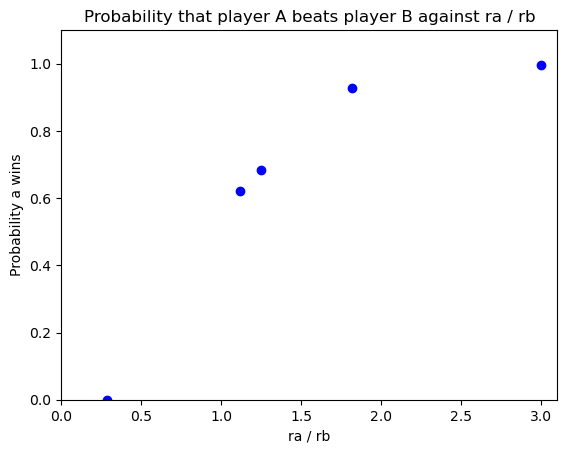

In [218]:
# Call the function to plot the figure here
plot_win_probabilities(read_abilities('test.csv'))

**Question 1e:** Complete the following function `win_probability_match(ra, rb, simulations, m)` to simulate `simulations` matches which are won by the first player to win `m` games, and returns an estimate of the probability that a player with ability `ra` will win such a match against a player of ability `rb`.

Provide code that works out the smallest value of `m` such that `win_probability_match(60, 40, simulations, m)` is at least `0.9`. 

_HINT: make sure you use an appropriate value for `simulations`._

**[Functionality: 5 marks]**

In [312]:
#step 1 
def match(ra,rb,m):
    a_win = 0
    b_win = 0
    
    while (a_win or b_win) < m:
        A,B = game(ra,rb)
        if A > B:
            a_win += 1
        elif B > A:
            b_win += 1
            
    return a_win,b_win      

In [326]:
match(60,40,5)

(5, 2)

In [327]:
def win_probability_match(ra, rb, simulations,m): 
	A_wins = 0 
	B_wins = 0
	for games in range(simulations): 
		C,D = match(ra, rb,m) #game(ra / rb) returns tuple
		if C > D:
			A_wins += 1
		else:
			B_wins += 1
	return (A_wins / simulations)

In [328]:
m = 0
simulations = 10000
ra = 60
rb = 40
while win_probability_match(ra,rb,simulations,m) < 0.9:
    m += 1
    
print(m)

2


In [329]:
def find_min_value(m,simulations,ra,rb,p):
    m = 0
    while win_probability_match(ra,rb,simulations,m) < p:
        m += 1
    return m

In [330]:
find_min_value(5,1000,60,40,0.9)

2

Question 2
==========

Complete the remaining template of a scientific report that uses the results of simulation (with suitable input data) to investigate whether English or PARS is the ``better'' scoring method for squash matches. 

You should clearly state any assumptions you make, and may add any number of code cells. Guidance for completing the markdown/text cells is given in the coursework specification. The word count of the remaining markdown/text cells must be at most 750.

Your investigation should consider the relative ability of the two players (i.e. `ra/rb`) as the _independent variable_ and include appropriate figures that show how your choice of relevant _dependent variable_ varies. Your results **must** cover at least 50 different values of `ra/rb`.

Some starting points you may consider:
- How _fair_ is the scoring method - does the better player usually win?
- Shorter matches are usually preferable (e.g. for television) - if you assume each rally in a match takes equal time, how long do matches typically last?
- What effect does the relative ability of the two players have?

**[Report: 7 marks; Achievement: 8 marks]**

## Problem

In the game of Squash two methods of scoring are present, the PARS and the English scoring methods. The problem that I will be investigating is which scoring method is better than the other. The term “better method” will be looked at in terms of fairness and length of games. Specifically looking at: 

        - The effect of the scoring methods on the length of a match
                Here I expect to see the English scoring method having a larger effect on the length of matches. Due to that condition where to win a point the player needs to be the current server. Whereas the PARS method players can win a point regardless of if they are the server or not. This would mean that the PARS method is “better” as it is shorter which results in it being more engaging to people watching on TV and live. 

        - The fairness in the scoring method in relationship to the players ability 
                I expect to see similar results as the player with higher skill ability should have the close to the same win probability in both scoring methods.


## Method

To investigate this problem I will be using a method that simulates scenarios that are then visually represented in the form of graphs, in order to gain a clear view of the differences in results. 

The method part of this investigation will involve the following steps:

    1. Develop algorithms to simulate the English and PARS scoring methods. This will involve implementing the specific rules for each method.
        - eg . Points are only awarded in the English method only if they are serving.

    2. Develop algorithms to calculate the probability that player X wins and the average number of rallies in the game for both scoring methods in Y amount of simulations.

    3. Use the algorithms to simulate the scoring of a set of sample data, and collect the results

    4. Visualise the simulations using appropriate graphs or charts to compare the performance between the two methods. This will involve plotting the following 
        4a. Probability A wins with respect to the skill ability of A/B
        4b. The number of rallies in a full game with respect to the skill ability of A/B

    5. Analyse the results of the simulations looking for trends and patterns that give us an insight on which is the fairer scoring method and which is the scoring method that takes longer in rallies. Knowing these we can then determine which scoring method is better.


## Assumptions

1. It is assumed that the ability and form of the player stays constant throughout the game. 
2. It is assumed that the game is played in a closed environment. 
3. It is assumed that the player's ability is a random value between 1 and 100. 
4. It is assumed in the English scoring method that when an 8-8 tie is present the winning score will be randomly chosen to be 9 or 10. 
5. It is assumed in the English scoring method that the server will be randomly chosen. 
6. It is assumed that the time length of each rally is equal


## Results

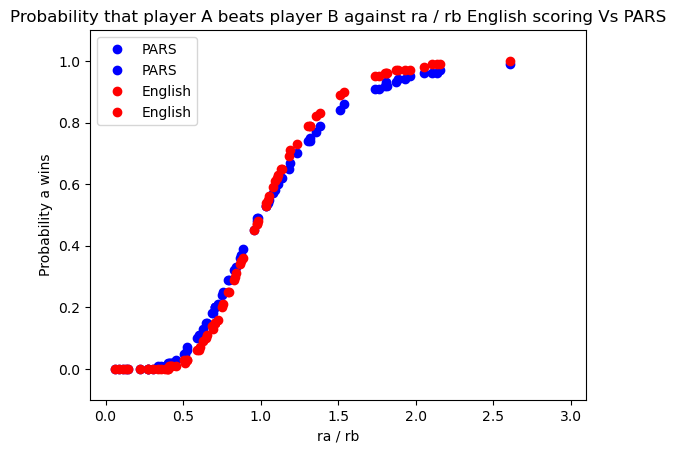

In [371]:
tuple_list = [(random.randint(1, 101), random.randint(1, 101))for i in range(100)]
plot_win_probabilities(tuple_list)

The graph above shows us the probability that A beats player B against the skill ability of player A over player B. We can see that the probability that player A wins with skill level ra is marginally equal in both scoring methods. 


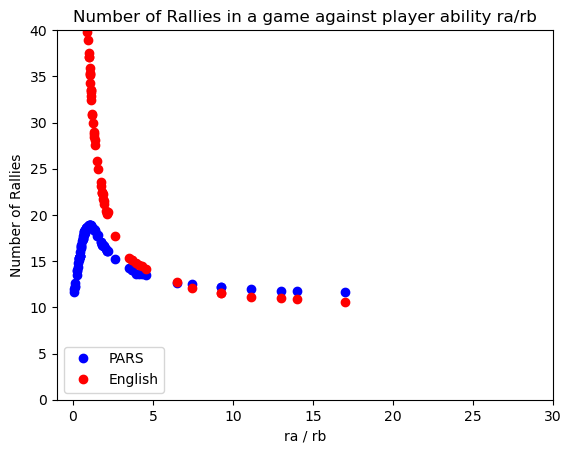

In [373]:
plot_rally(tuple_list)

The graph above indicates the number of rallies per game against player A ability / player Bs ability. We can see that the number of rallies when using the English scoring method is greater. 

## Conclusions

In conclusion given the results from the simulations, we can deduce from the figures above that the fairness of both scoring methods are equal. In addition to this we can see that the english scoring method takes more rallies per game making it longer in time. Therefore making the PARS scoring method the better scoring method. As it is shorter and as fair as the English method. 

# ----------------------------------------CODE FOR QUESTION 2-------------------------------------


## Simulating PARS

In [10]:
def game_pars(ra,rb):
    p = ra/(ra+rb) #stores probability of player A winning a point
    a_score = 0 
    b_score = 0 
    rallies = 0
   
    #conditon to stop is when (A == 11 and A-B >= 2 or B == 11 and B-A >= 2)
    while (a_score < 11 and b_score < 11) or abs(a_score - b_score) < 2: #abs ingnores negative symbol incase b is larger then A
        r = random.random() #random number between 0,1
        if r < p:
            a_score += 1 
        else:
            b_score += 1 
        rallies += 1
            
    return a_score,b_score,rallies #Returns tuple



def win_probability_pars(ra, rb, simulations): 
    
	A_wins = 0 
	rally = 0
    
	for games in range(simulations): 
		A_score,B_score,Rallies = game_pars(ra, rb) #game(ra / rb) returns tuple
		if A_score > B_score: #return value of game is tuple so can be accessed like this
			A_wins += 1 
		rally += Rallies
	avg_rally = rally / simulations
        
        

	return round((A_wins / simulations),2) ,round(avg_rally,2)

In [275]:
win_probability_pars(70,30,1000)

(0.98, 15.77)

## Simulating English

In [272]:
def game_english(ra,rb):
    p = ra/(ra+rb) 
    a_score = 0 
    b_score = 0 
    rallies = 0
    game_over = False 
    win = 9
    server = random.choice(["a","b"])
    
    while game_over == False:
        r = random.random() 
        if r < p and server == "a":
           a_score += 1 
        elif r < p and server != "a":
            server = "a" 
        elif r > p and server == "b":
            b_score += 1
        elif r > p and server != "b":
            server = "b"
        if a_score == 8 and b_score == 8:
            win = random.choice([9,10])
        rallies += 1
        if (a_score or b_score) == win:
            game_over = True
            return a_score,b_score,rallies
        
        
    
def win_probability_english(ra, rb, simulations): 
    
	A_wins = 0 
	rally = 0
    
	for games in range(simulations): 
		A_score,B_score,Rallies = game_english(ra, rb) #game(ra / rb) returns tuple
		if A_score > B_score: #return value of game is tuple so can be accessed like this
			A_wins += 1 
		rally += Rallies
	avg_rally = rally / simulations
        
        

	return round((A_wins / simulations),2) ,round(avg_rally,2)

## Plotting Win probability 

In [357]:
def plot_win_probabilities(skill_list): # HINT: what should the argument be?
    x_axis_pars = []
    y_axis_pars = []
    x_axis_english = []
    y_axis_english = []
    
    for rating in skill_list:
        y_axis_pars.append(win_probability_pars(rating[0],rating[1],10000)) 
        x_axis_pars.append(rating[0] / rating[1])
        
        y_axis_english.append(win_probability_english(rating[0],rating[1],10000)) 
        x_axis_english.append(rating[0] / rating[1])
        
        
        
        
    plt.title('Probability that player A beats player B against ra / rb English scoring Vs PARS')
    plt.xlabel('ra / rb')
    plt.ylabel('Probability a wins')
    plt.axis([-0.1,3.1,-0.1,1.1])
    plt.plot(x_axis_pars, y_axis_pars,'ob',label = "PARS")
    plt.plot(x_axis_english, y_axis_english,'or', label = "English")
    plt.legend()
    
    plt.show()
    
            

## Generates 100 random sample data of abilities for player A and B between 1,100

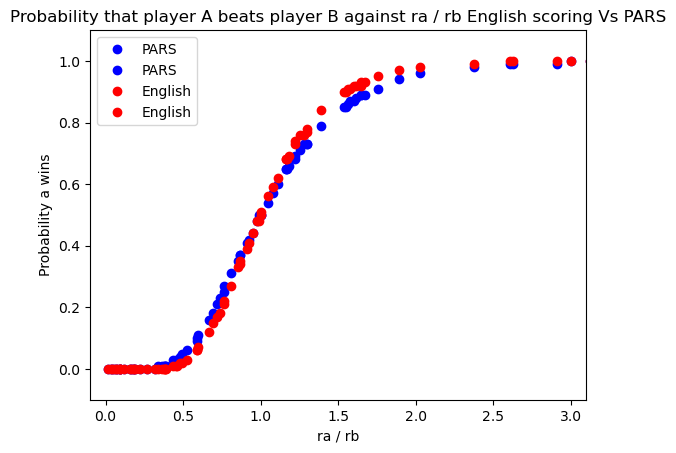

In [358]:
tuple_list = [(random.randint(1, 101), random.randint(1, 101))for i in range(100)]
plot_win_probabilities(tuple_list)

## Plotting Number of Rallies taken

In [372]:
def plot_rally(skill_list):
    x_axis_pars = []
    y_axis_pars = []
    x_axis_english = []
    y_axis_english = []
    
    for rating in skill_list:
       x_axis_pars.append(rating[0] / rating[1])
       y_axis_pars.append(win_probability_pars(rating[0],rating[1],1000)[1])
       
       x_axis_english.append(rating[0]/rating[1])
       y_axis_english.append(win_probability_english(rating[0],rating[1],1000)[1])
        
        
        
        
    plt.title('Number of Rallies in a game against player ability ra/rb')
    plt.xlabel('ra / rb')
    plt.ylabel('Number of Rallies')
    plt.axis([-1,30,0,40])
    plt.plot(x_axis_pars, y_axis_pars,'ob',label = "PARS")
    plt.plot(x_axis_english, y_axis_english,'or', label = "English")
    plt.legend()
    
    plt.show()
    
    
    
    


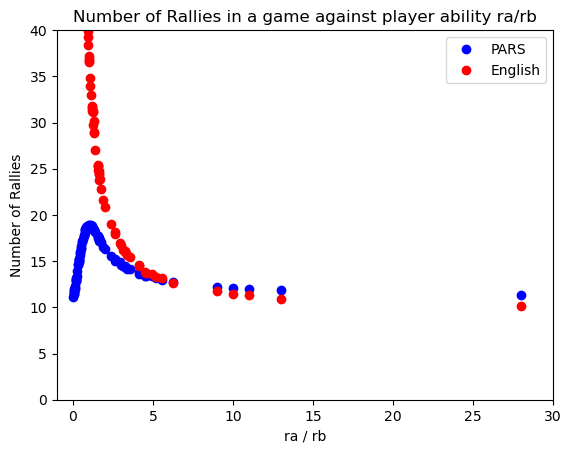

In [370]:
plot_rally(tuple_list)